In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
dfwh = pd.read_csv(r"C:\Users\hp\Desktop\Dataset_2 set\Outlier Detection\weight-height.csv")

In [4]:
dfwh

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [5]:
import matplotlib.pyplot as plt

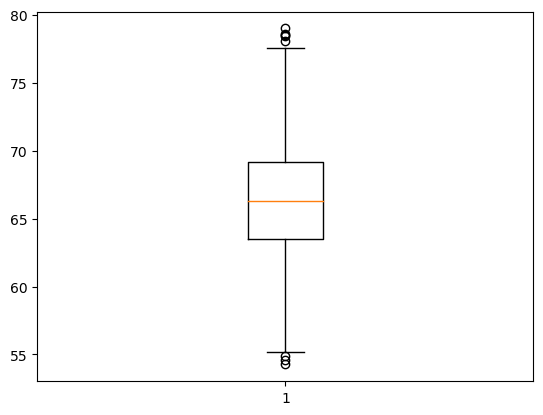

In [7]:
plt.boxplot(dfwh["Height"])
plt.show()

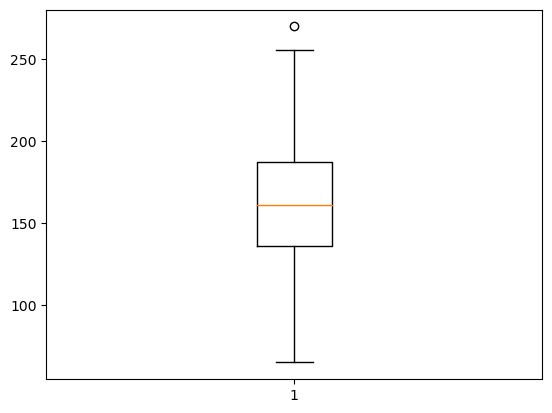

In [9]:
plt.boxplot(dfwh["Weight"])
plt.show()

### Mean-std Method

### lower limit  -->  mean - 3 * std

### upper limit --> mean +  3* std

In [10]:
dfwh["Height"]

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [11]:
dfwh["Height"].mean()

66.36755975482106

In [12]:
np.round(dfwh["Height"].mean())

66.0

In [13]:
m = dfwh["Height"].mean()

In [14]:
m

66.36755975482106

In [15]:
s = dfwh["Height"].std()

In [16]:
s

3.8475281207732324

In [17]:
dfwh["Height"].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [18]:
m

66.36755975482106

In [19]:
m - (3 * s)

54.82497539250136

In [20]:
lower = m - (3 * s)

In [21]:
m + (3 * s )

77.91014411714076

In [22]:
upper = m + (3 * s )

In [23]:
lower

54.82497539250136

In [24]:
upper

77.91014411714076

In [25]:
dfwh["Height"].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [26]:
dfwh["Height"] < lower

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Height, Length: 10000, dtype: bool

In [27]:
dfwh[ dfwh["Height"] < lower ]

,Gender,Height,Weight
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [28]:
dfwh["Height"] > upper

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Height, Length: 10000, dtype: bool

In [29]:
dfwh[  dfwh["Height"] > upper ]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783


In [30]:
(dfwh["Height"] < lower)  |  (dfwh["Height"] > upper)

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Height, Length: 10000, dtype: bool

In [31]:
dfwh[ (dfwh["Height"] < lower)  |  (dfwh["Height"] > upper) ]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


### Trimming 

#####  Frist Method of Trimming

In [33]:
dfwh[ (dfwh["Height"] < lower)  |  (dfwh["Height"] > upper) ].index

Int64Index([994, 1317, 2014, 3285, 3757, 6624, 9285], dtype='int64')

In [34]:
dfwh.drop([994, 1317, 2014, 3285, 3757, 6624, 9285], axis = 0)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


##### Second Method

In [36]:
dfwh[ (dfwh["Height"] < lower)  |  (dfwh["Height"] > upper) ]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [37]:
( dfwh["Height"] >= lower ) & (dfwh["Height"] <= upper)

0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Name: Height, Length: 10000, dtype: bool

In [39]:
dfwh = dfwh[ ( dfwh["Height"] >= lower ) & (dfwh["Height"] <= upper)]

In [40]:
dfwh

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


###  CAPPING

In [41]:
dfweight = pd.read_csv(r"C:\Users\hp\Desktop\Dataset_2 set\Outlier Detection\weight-height.csv")

In [42]:
dfweight

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [43]:
dfweight["Height"]

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [44]:
m1 = dfweight["Height"].mean()

In [45]:
m1

66.36755975482106

In [46]:
s1 = dfweight["Height"].std()

In [47]:
s1

3.8475281207732324

In [48]:
dfweight["Height"].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [49]:
m1

66.36755975482106

In [50]:
low  =  m1 - (3 *s1)

In [51]:
low

54.82497539250136

In [52]:
up = m1 + ( 3 *s1)

In [53]:
dfweight["Height"] < low

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Height, Length: 10000, dtype: bool

In [54]:
dfweight[dfweight["Height"] < low]

,Gender,Height,Weight
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [56]:
dfweight["Height"] > up

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Height, Length: 10000, dtype: bool

In [57]:
dfweight[dfweight["Height"] > up]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783


In [58]:
(dfweight["Height"] < low) | (dfweight["Height"] > up)

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Height, Length: 10000, dtype: bool

In [59]:
dfweight[ (dfweight["Height"] < low) | (dfweight["Height"] > up) ]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [60]:
dfweight["Height"]

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [62]:
dfweight["Height"] = dfweight["Height"].map( lambda x : low  if x < low else  up if x > up else x)

In [63]:
dfweight

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [64]:
dfweight[ (dfweight["Height"] < low) | (dfweight["Height"] > up) ]

,Gender,Height,Weight


In [66]:
import warnings

In [67]:
warnings.filterwarnings("ignore")

In [68]:
import seaborn as sns

<AxesSubplot:xlabel='Height', ylabel='Density'>

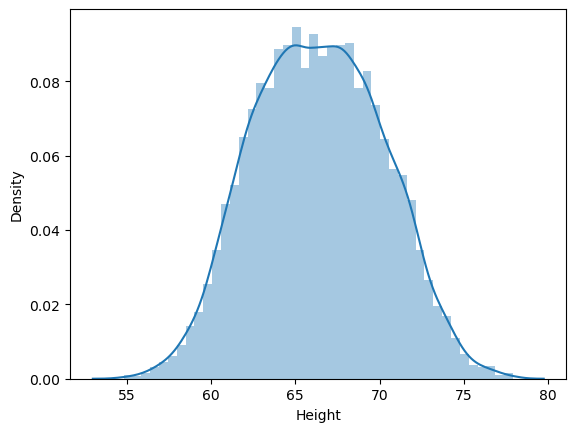

In [69]:
sns.distplot(dfweight["Height"])

In [70]:
dfweight["Height"].skew()

0.047797528790700206

In [71]:
np.round(dfweight["Height"].skew())

0.0